This part of the process is mainly done by Data Analysts or Data Scientists.
This notebook is based on the information and instructions from the website:

https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/


## Wine Quality Classifier 
### (Data Explorations and Preparations):
* [Install and load packages](#install-load)
* [Data Explorations & Feature Engineering](#data-explorations)
* [Raw Data to Training, Testing, and Validaiton](#raw-data-3-datasets)

<a id="install-load"></a>
# Install and Load Packages

In [1]:
!python --version

Python 3.9.4


In [11]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os

from sklearn.model_selection import train_test_split
 
import warnings
warnings.filterwarnings('ignore')

<a id="data-explorations"></a>
# Data Explorations & Feature Engineering

In [25]:
# Reading the data
df = pd.read_csv('raw_data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Print out some information about the dataset
* Name of each feature or column
* data type of each feature columns present in the dataset.
* How many non-null values are in the dataset 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 #### Exploring some statistical analysis of the dataset. 
 * **Count :** Sum of number of non-NA/null observations.
 * **mean :** Mean of the values.
 * **Std :** Standard deviation of the observations.
 * **min :** Minimum of the values in the object.
 * **max :** Maximum of the values in the object.
 * **25% :** The value below which 25% of the data falls
 * **50% :** The value below which 25% of the data falls == Medien
 * **75% :** The value below which 75% of the data falls

In [26]:
#descriptive statistical measures of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


It is important to examine, how many null values are in the dataset. 
Because in the training process these null values could impede or diminish the model performance.

In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Distribution of the data in each column could be observed in a histogram plot.

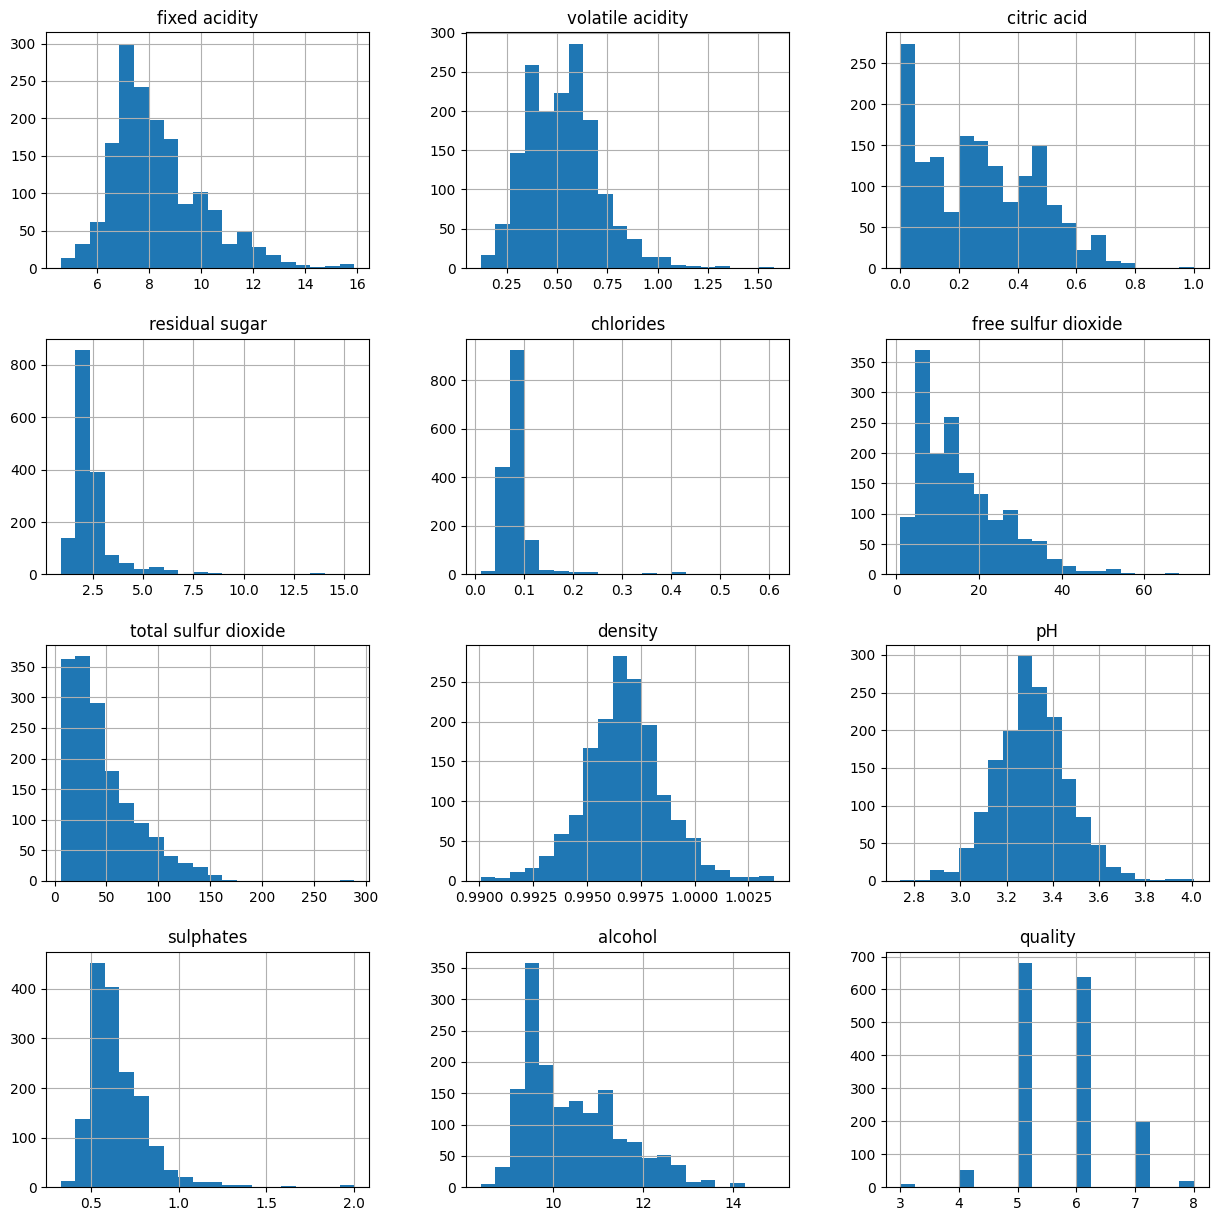

In [28]:
df.hist(bins=20, figsize=(15, 15))
plt.show()

How much alcohol is present in each wine quality?

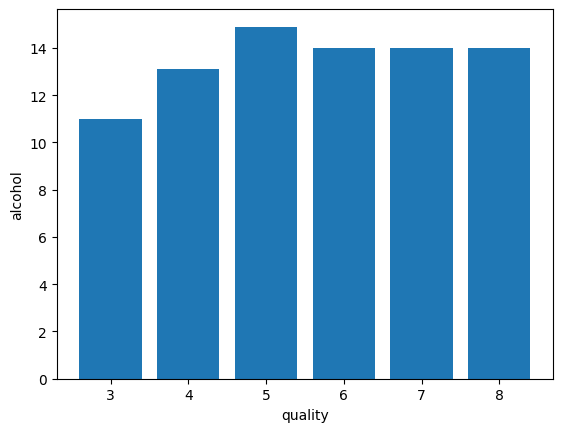

In [17]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

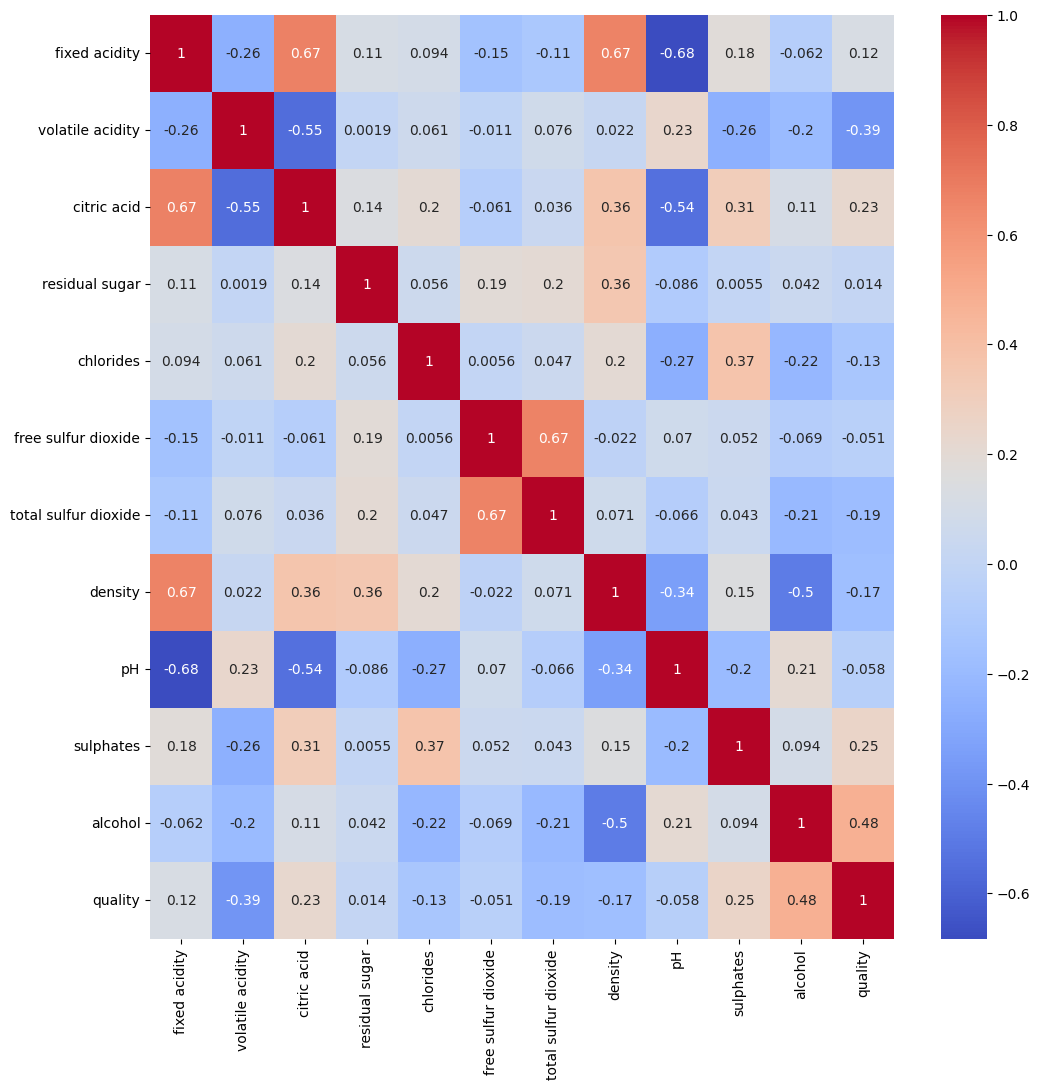

In [18]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() , annot=True, cmap = 'coolwarm',cbar=True)
plt.show()

In [29]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [30]:
# How many wines of each quality are there in the dataset?
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

With bar charts we take a look at the distribution of the labled classes (i.e wine qualities) for this classifiction problem. 

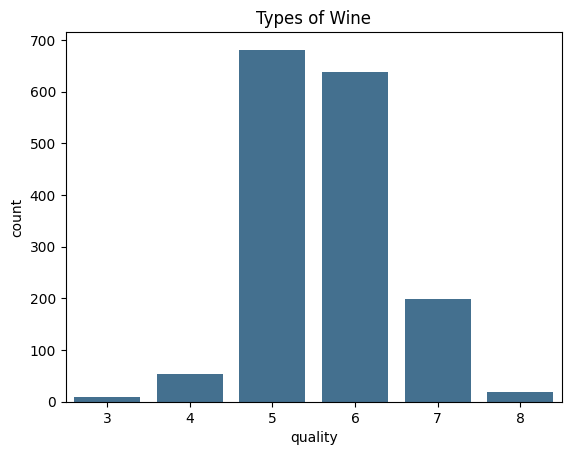

In [31]:
# Plot quality classification 
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.show()

In [32]:
#df = df.drop('total sulfur dioxide', axis=1)

For simplicity we classify the wine qualites into two classes. 

Sometimes it is more informative to rearrange the dataset or labels in order to help with the model performance.

Therefore, here we separate the wine qualities more than 5 in a class (1) and less than 5 in another class (0). And create a new column called "best quality".

In [33]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [34]:
df.head(n=15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [35]:
df_processed = df.drop(['quality'], axis=1)
df_processed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<a id="raw-data-3-datasets"></a>
# Split Raw Data to three Datasets
### Training, Testing, and Validaiton

In [36]:
# Split the dataset into training (60%), and temp (40% for testing + validation)
train_df, temp_df = train_test_split(df_processed, test_size=0.3, random_state=42)

# Further split temp into testing (20%) and performance (20%)
test_df, perf_df = train_test_split(temp_df, test_size=0.2, random_state=42)
print("Datasets have been split")

Datasets have been split


In [37]:
print("Number of items in the original processed DataFrame:", len(df_processed))
print("Number of items in the training DataFrame (70%):", len(train_df))
print("Number of items in the testing DataFrame (25%):", len(test_df))
print("Number of items in the performance DataFrame (5%):", len(perf_df))

Number of items in the original processed DataFrame: 1599
Number of items in the training DataFrame (70%): 1119
Number of items in the testing DataFrame (25%): 384
Number of items in the performance DataFrame (5%): 96


In [38]:
# Save the datasets to separate CSV files
# please remove the directories if they exist.
df_dirs = ["training_data", "testing_data", "performance_data"]

for df_dir in df_dirs:
    # Create the directory
    if not os.path.exists(df_dir):
        os.mkdir(df_dir)
        print(f"Directory '{df_dir}' created successfully!")
    else:
        print(f"Directory '{df_dir}' already exists. Please delete the dir and start again.")

train_df.to_csv('training_data/train_dataset.csv', index=False)
test_df.to_csv('testing_data/test_dataset.csv', index=False)
perf_df.to_csv('performance_data/perf_dataset.csv', index=False)
print("Datasets have been saved as CSV files in their corresponding directory.")

Directory 'training_data' created successfully!
Directory 'testing_data' created successfully!
Directory 'performance_data' created successfully!
Datasets have been saved as CSV files in their corresponding directory.


<<<<< IGNORE BELOW CELLs >>>>>

<<<<< The notebook will be further developed >>>>>

In [8]:
# If there are missing values, we could impute them by means as the data present in the different columns are continuous values.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

np.int64(0)

In [70]:
# Save the processed data to file "*training_data/winequality-red.csv*".
#  df_dir = ["training_data", "testing_data", "performance_data"]

# for df_name in df_dir:
#     !mkdir f"{df_name}"
#     print(os.listdir('training_data'))

#     file_path = 'training_data/winequality-red.csv' # Replace with your file path

#     if os.path.exists(file_path):  # Check if the file exists
#         os.remove(file_path)  # Delete the file
#         print(f"{file_path} has been deleted.")

#     import os
#     print(os.listdir('training_data'))

#     df_train.to_csv(f'{file_path}', index=False)

#     import os
#     print(os.listdir('training_data'))